In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import recall_score, precision_score, confusion_matrix, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
bank_data = pd.read_csv('bank-additional-full.csv', sep = ';')
bank_data.shape

(41188, 21)

In [3]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# preprocessing

In [6]:
# Renaming column y to subscribed as it is column explains about term deposit subscription yes or no
bank_data.rename(columns = {'y': 'subscribed'}, inplace = True)

In [7]:
categorical_columns = bank_data.select_dtypes(include = object).columns
for col in categorical_columns:
    print(col,bank_data[col].unique())

job ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital ['married' 'single' 'divorced' 'unknown']
education ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default ['no' 'unknown' 'yes']
housing ['no' 'yes' 'unknown']
loan ['no' 'yes' 'unknown']
contact ['telephone' 'cellular']
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome ['nonexistent' 'failure' 'success']
subscribed ['no' 'yes']


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_columns:
    bank_data[col] = le.fit_transform(bank_data[col])

In [9]:
bank_data.subscribed.value_counts()

0    36548
1     4640
Name: subscribed, dtype: int64

In [10]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [11]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int32  
 2   marital         41188 non-null  int32  
 3   education       41188 non-null  int32  
 4   default         41188 non-null  int32  
 5   housing         41188 non-null  int32  
 6   loan            41188 non-null  int32  
 7   contact         41188 non-null  int32  
 8   month           41188 non-null  int32  
 9   day_of_week     41188 non-null  int32  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int32  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

0    36548
1     4640
Name: subscribed, dtype: int64


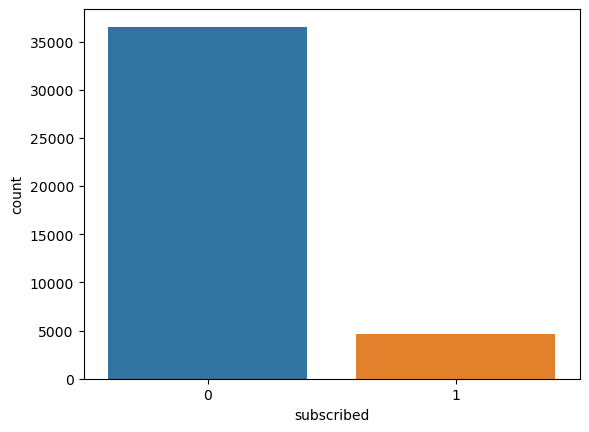

In [12]:
print(bank_data.subscribed.value_counts())
sns.countplot(x = bank_data['subscribed'] )
plt.show()

In [13]:
from imblearn.over_sampling import SMOTE
# Resampling the data to balance
def resample_data(features_data, target_data):
  sm = SMOTE(sampling_strategy = 'minority', random_state = 42)

  X_resampled, Y_resampled = sm.fit_resample(features_data, target_data)
  bank_data_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(Y_resampled)], axis = 1)
  return bank_data_resampled

In [14]:
features_data = bank_data.drop('subscribed', axis = 1)
target_data = bank_data['subscribed']
bank_data_resampled = resample_data(features_data, target_data)
bank_data_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73096 entries, 0 to 73095
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             73096 non-null  int64  
 1   job             73096 non-null  int32  
 2   marital         73096 non-null  int32  
 3   education       73096 non-null  int32  
 4   default         73096 non-null  int32  
 5   housing         73096 non-null  int32  
 6   loan            73096 non-null  int32  
 7   contact         73096 non-null  int32  
 8   month           73096 non-null  int32  
 9   day_of_week     73096 non-null  int32  
 10  duration        73096 non-null  int64  
 11  campaign        73096 non-null  int64  
 12  pdays           73096 non-null  int64  
 13  previous        73096 non-null  int64  
 14  poutcome        73096 non-null  int32  
 15  emp.var.rate    73096 non-null  float64
 16  cons.price.idx  73096 non-null  float64
 17  cons.conf.idx   73096 non-null 

In [15]:
bank_data_resampled.subscribed.value_counts()

0    36548
1    36548
Name: subscribed, dtype: int64

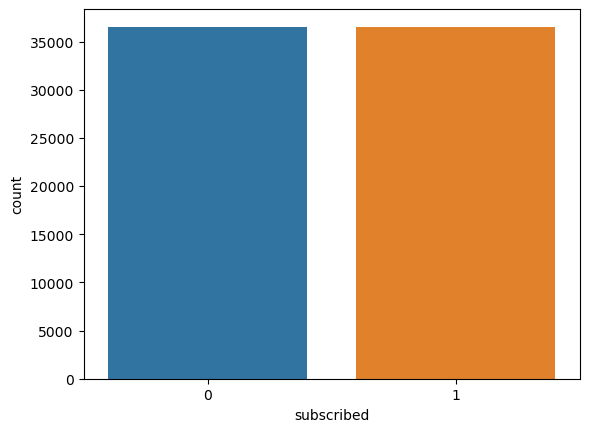

In [16]:
sns.countplot(x = bank_data_resampled['subscribed'])
plt.show()

In [17]:
### Principle component analysis for features selection

In [18]:
def scale_data(data_before_scaling):
  ''' scaling data '''
  ss = StandardScaler()
  scaled_data = ss.fit_transform(data_before_scaling)
  return scaled_data

In [19]:
def principle_components(data, variance):
  ''' finding priciple components of data for a variance'''
  scaled_data = scale_data(data.values)
  pca = PCA(n_components = variance)
  principle_components = pca.fit_transform(scaled_data)
  principle_components_df = pd.DataFrame(data = principle_components)
  principle_components_df.columns = principle_components_df.columns.astype(str)
  plt.plot(pca.explained_variance_, marker='*')
  plt.xlabel("Eigenvalue number")
  plt.ylabel("Eigenvalue size")
  plt.title("Scree Plot")
  plt.show()

  return principle_components_df

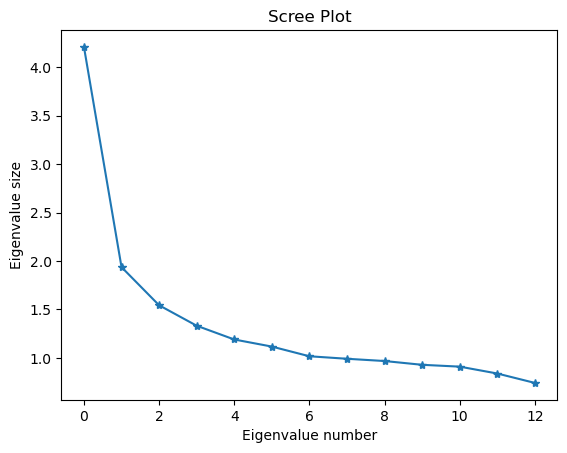

(73096, 13)

In [20]:
features_data = bank_data_resampled.drop(columns = 'subscribed', axis = 0)
target_data = bank_data_resampled['subscribed']
principle_components_df = principle_components(features_data, 0.85)
principle_components_df.shape

In [21]:
def model_score(target_values, predicted_values):
  cm = confusion_matrix(target_values, predicted_values)
  print("recall score = ", 100 * recall_score(target_values, predicted_values))
  print("precision score", 100 * precision_score(target_values, predicted_values))
  print("f1 score", 100 *f1_score(target_values, predicted_values))
  fig, ax = plt.subplots(figsize=(3, 3))
  ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
  for i in range(cm.shape[0]):
       for j in range(cm.shape[1]):
           ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

  plt.xlabel('Predictions', fontsize = 12)
  plt.ylabel('Actuals', fontsize = 12)
  plt.title('Confusion Matrix', fontsize = 12)
  plt.show()


In [22]:
X_train, X_test, y_train, y_test = train_test_split( principle_components_df, target_data, test_size = 0.3, random_state=0)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(51167, 13) (21929, 13)
(51167,) (21929,)


In [23]:
def logistc_regression(X_train, y_train):
  model = LogisticRegression()
  solvers = ['newton-cg', 'lbfgs', 'liblinear']
  penalty = ['l2']
  c = [100, 10, 1.0, 0.1, 0.01]

  grid = dict(solver=solvers,penalty=penalty, C = c)
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
  grid_result = grid_search.fit(X_train, y_train)

  return grid_result.best_score_, grid_result.best_params_

In [24]:
best_score, best_params = logistc_regression(X_train, y_train)

In [25]:
print(best_score, best_params)

0.8617012901493125 {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


recall score =  87.66257225433526
precision score 85.73447575302535
f1 score 86.68780422453446


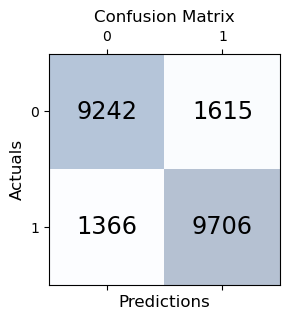

In [26]:
model_lr = LogisticRegression (C = 100, penalty = 'l2', solver ='liblinear')
model_lr.fit(X_train, y_train)
y_predicted = model_lr.predict(X_test)
model_score(y_test, y_predicted)

In [31]:
def knn_hyperparameter_tuning(X_train, y_train, X_test, y_test):
  best_score = 0.0
  best_k = -1
  for k in range(4, 20):
      knn_classifier = KNeighborsClassifier(n_neighbors = k)
      knn_classifier.fit(X_train, y_train)
      score = knn_classifier.score(X_test, y_test)
      if score > best_score:
          best_k = k
          best_score = score
  print("Best Score", best_score, "Best k ", best_k )
  return best_k, best_score, knn_classifier

In [32]:
best_k_value, best_score, knn_classifier = knn_hyperparameter_tuning(X_train, y_train, X_test, y_test)

Best Score 0.9145423867937434 Best k  5


recall score =  92.41329479768787
precision score 88.77320839840361
f1 score 90.55668643242765


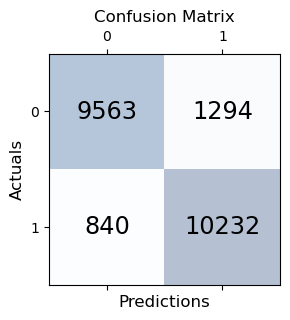

In [33]:
knn_classifier.fit(X_train, y_train)
y_predicted = knn_classifier.predict(X_test)
model_score(y_test, y_predicted)

In [34]:
#extratree classifier feature selection technique

In [35]:
def Extratree_feature_selection(features_data, target_data, k_best_features):
  ''' Feature selection using extra tree classifier algorithm for tree based classifiers'''
  model = ExtraTreesClassifier()
  model.fit(features_data, target_data)
  print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
  #plot graph of feature importances for better visualization
  feat_importances = pd.Series(model.feature_importances_, index = features_data.columns)
  feat_importances.nlargest(k_best_features).plot(kind='barh')
  plt.show()
  return feat_importances.nlargest(k_best_features).keys()

[0.038568   0.03106665 0.01900782 0.03273974 0.03191436 0.04717766
 0.02947906 0.05843569 0.03919295 0.03006622 0.23041607 0.02687861
 0.02674961 0.02067479 0.02015676 0.038157   0.04115013 0.0480185
 0.12023746 0.06991292]


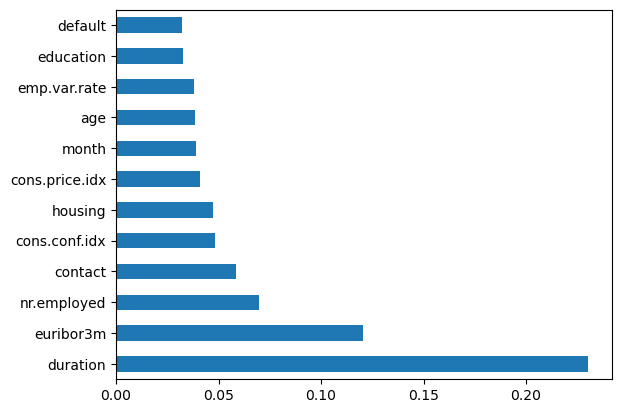

Index(['duration', 'euribor3m', 'nr.employed', 'contact', 'cons.conf.idx',
       'housing', 'cons.price.idx', 'month', 'age', 'emp.var.rate',
       'education', 'default'],
      dtype='object')


In [36]:
best_features = Extratree_feature_selection(features_data, target_data, 12)
print(best_features)

In [37]:
X_train, X_test, y_train, y_test = train_test_split( bank_data_resampled[best_features],
                                                    bank_data_resampled.subscribed, test_size = 0.3, random_state=0)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(51167, 12) (21929, 12)
(51167,) (21929,)


In [38]:
def decision_tree_classifier(features, target):
  ''' parameter tuning for decision tree classifier'''
  param = {
      'criterion': ['gini', 'entropy'],
      'max_depth':[5,7,10,15,18],
      'min_samples_leaf':[3,5,10,15,20],
      'min_samples_split':[8,10,12,18,20,16]
  }
  grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid = param, cv = 6)
  grid_dt.fit(features, target)
  return grid_dt.best_params_, grid_dt.best_score_

In [39]:
best_params, best_score = decision_tree_classifier(X_train, y_train)
print("Best score", best_score, "Best parameters", best_params)

Best score 0.9203197795796055 Best parameters {'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 3, 'min_samples_split': 8}


recall score =  92.54877167630057
precision score 91.63834734394563
f1 score 92.09130942751864


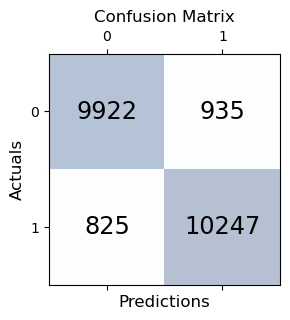

In [43]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 18, min_samples_split =  8, min_samples_leaf =  3)
dt_model.fit(X_train, y_train)
y_predicted = dt_model.predict(X_test)
model_score(y_test, y_predicted)

In [41]:
def random_forest_classifier(features, target):
  ''' parameter tuning for Random Forest classifier'''
  param_grid = {
      'n_estimators': [25, 50, 100, 150],
      'max_features': ['sqrt', 'log2'],
      'max_depth': [ 6, 9, 12, 15 ],
      'criterion':['entropy', 'gini']

  }
  grid_rf = GridSearchCV(RandomForestClassifier(),
                            param_grid = param_grid, cv = 5 )
  grid_rf.fit(features, target)
  return grid_rf.best_params_, grid_rf.best_score_

In [42]:
best_parameters, best_score = random_forest_classifier(X_train, y_train)
print("best score", best_score, "best parameters", best_parameters)

best score 0.9378505064935986 best parameters {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 100}


recall score =  96.59501445086705
precision score 91.78681771369722
f1 score 94.12955465587045


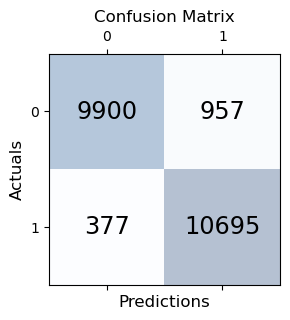

In [44]:
rf_model = RandomForestClassifier(criterion = 'gini', max_depth = 15, n_estimators = 100, max_features = 'sqrt', )
rf_model.fit(X_train, y_train)
y_predicted = rf_model.predict(X_test)
model_score(y_test, y_predicted)